In [8]:
import pandas as pd #데이터 표로 만들기 휘안 라이브러리
import numpy as np #고성능 수치 계산을 위한 라이브러리

d=pd.read_csv('./sample_data/mnist_test.csv',header=None)
#데이터 불러오기 첫번째 열은 정답(label)이고 나머지 784=28*28 픽셀
d=np.array(d)
#pandas의 dataFrame형태를 Numpy형태 (array)로 변환
y_train=d[:,1:].reshape(-1,28,28)
#d[:,1:]=> d[행범위, 열범위] => 즉 행은 전부 열은 1부터 끝까지 가지고 오겠다.
# 이걸 28*28 이차원 이미지로 만든다.-1은 컴퓨터에게 알아서 해줘라고 하는 뜻
y_train=y_train/255
#정규화 픽셃갓이 0~255라서 0과 1사이의 값으로 맞춰준다.



In [21]:
import tensorflow.keras as keras
from keras import Sequential
from keras import layers, optimizers
#생성모델
model_gen=Sequential()
model_gen.add(layers.Dense(units=3136,activation='relu'))
model_gen.add(layers.BatchNormalization())
model_gen.add(layers.Reshape((7,7,64)))
model_gen.add(layers.UpSampling2D((2,2)))
model_gen.add(layers.Conv2D(filters=32, kernel_size=3,padding='same',activation='relu'))
model_gen.add(layers.BatchNormalization())
model_gen.add(layers.UpSampling2D((2,2)))
model_gen.add(layers.Conv2D(filters=16, kernel_size=3,padding='same',activation='relu'))
model_gen.add(layers.BatchNormalization())
model_gen.add(layers.Conv2D(filters=1, kernel_size=3,padding='same',activation='sigmoid'))
model_gen.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])




In [ ]:
#판별모델
model_disc=Sequential()
model_disc.add(layers.Conv2D(filters=16,kernel_size=3,padding='same',input_shape=(28,28,1),activation='relu'))
model_disc.add(layers.Conv2D(filters=16,kernel_size=3,padding='same',activation='relu'))
model_disc.add(layers.MaxPooling2D(pool_size=(3,3), strides=2))
model_disc.add(layers.Conv2D(filters=16,kernel_size=3,padding='same',activation='relu'))
model_disc.add(layers.Conv2D(filters=16,kernel_size=3,padding='same',activation='relu'))
model_disc.add(layers.MaxPooling2D(pool_size=(3,3), strides=2))
model_disc.add(layers.Flatten())
model_disc.add(layers.Dense(units=1,activation='sigmoid'))
model_disc.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#생성모델과 판별모델의 연결

model_comb=Sequential()
model_comb.add(model_gen)
model_comb.add(model_disc)
model_disc.trainable=False
model_comb.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [24]:
#학습
nOrig=64
nGen=nOrig
vector_size=10
nEpoch=30

In [25]:

for i in range(nEpoch):
  print(f'{i}/{nEpoch}')
  #이미지 생성
  y_gen=np.zeros((nGen,28,28))
  test_input=np.random.rand(nGen,vector_size)
  for j in range(nGen):
    o=model_gen.predict(test_input[j,:].reshape(1,10))
    o=o.reshape((28,28))
    y_gen[j,:]=o
  y_gen=np.expand_dims(y_gen,-1)

  #원본 이미지 선택
  idx=np.array(range(y_train.shape[0]))
  np.random.shuffle(idx)
  idx=idx[:nOrig]
  y_orig=y_train[idx,:,:]
  y_orig=np.expand_dims(y_orig,-1)

  #원본이미지와 생성이미지의 결함
  test_img=np.concatenate((y_gen,y_orig),0)
  test_target=np.concatenate((np.zeros(y_gen.shape[0]),np.ones(y_gen.shape[0])),0)

  #판별자 학습
  loss_disc=model_disc.train_on_batch(test_img,test_target)

  #생성자 학습
  loss_gen=model_comb.train_on_batch(test_input,np.ones(test_input.shape[0]))





0/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

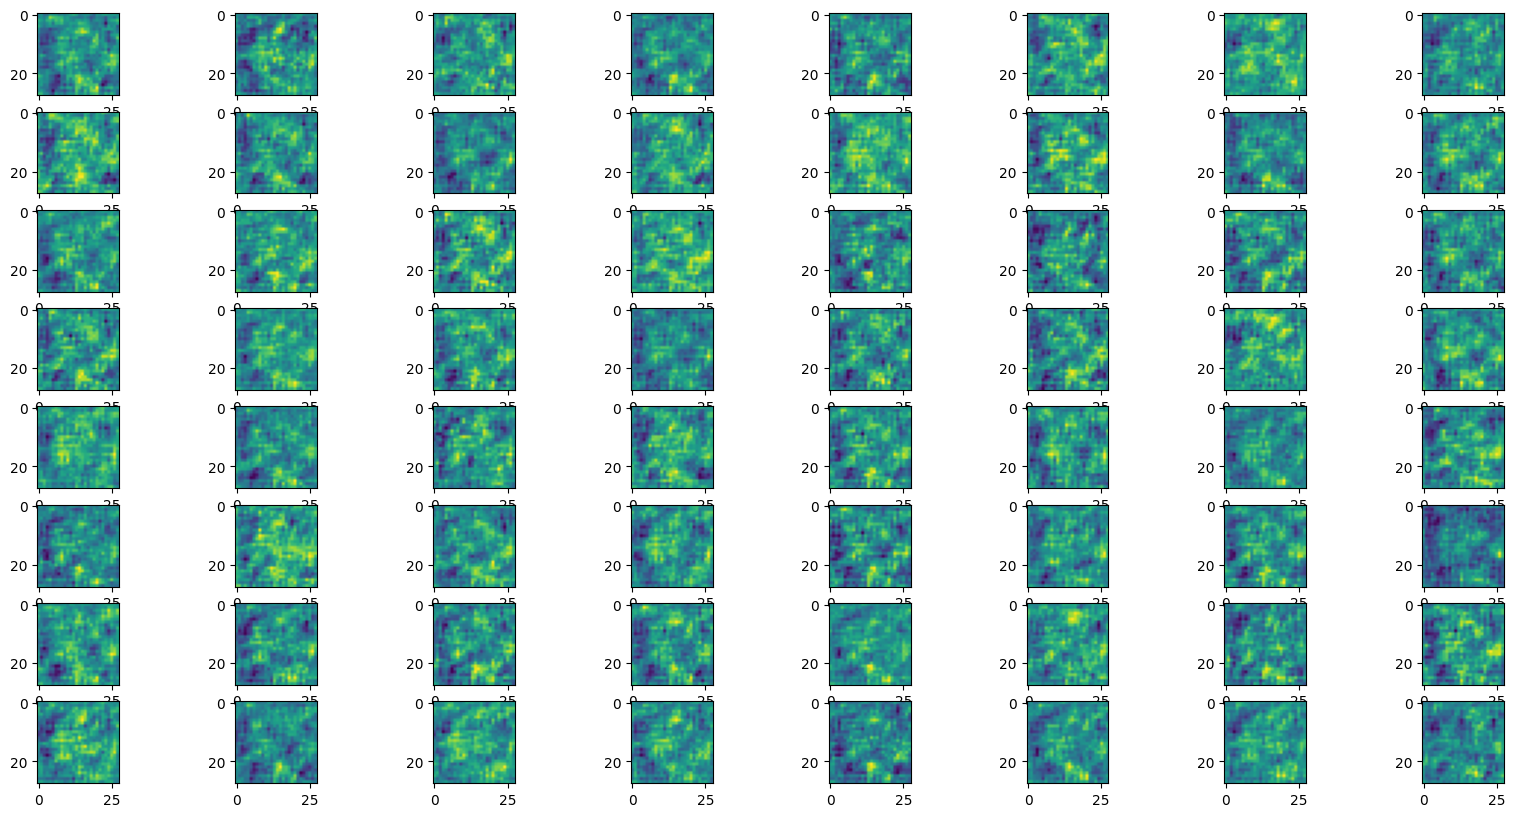

In [26]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=[20,10])
test_input=np.random.rand(nGen,vector_size)
for i in range(nGen):
  o=model_gen.predict(test_input[i,:].reshape(1,vector_size))
  o=o.reshape((28,28))
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(o)